In [1]:
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.morphology import dilation,binary_dilation
from scipy.ndimage import grey_dilation
from scipy.signal import convolve2d
import cv2
from skimage import io, exposure

In [2]:
image_data = nib.load('../data_sep/lesions_qc/marseille-3T-mp2rage/sub-MRS01/ses-M0/anat/sub-MRS01_ses-M0_UNIT1.nii.gz')
image = np.array(image_data.get_fdata())
header_image = image_data.header
res_1 = header_image["pixdim"][2]
res_2 = header_image["pixdim"][3]
print("res = ",res_1, res_2)
image_data_sc_ca = nib.load('../data_sep/lesions_qc/test_contrast_mp2rage_marseille/sub-MRS01_ses-M0_UNIT1_pred.nii.gz')
image_sc_ca = np.array(image_data_sc_ca.get_fdata())
#image_sc_ca_n =  cv2.normalize(image_sc_ca, None, 0, 2, cv2.NORM_MINMAX)
image_sc_ca_n =  exposure.rescale_intensity(image_sc_ca, in_range=(0.5,np.max(image_sc_ca)))

image_data_sc_ca_bin = nib.load('../data_sep/lesions_qc/test_contrast_mp2rage_marseille/sub-MRS01_ses-M0_UNIT1_pred_bin.nii.gz')
image_sc_ca_bin = np.array(image_data_sc_ca_bin.get_fdata())

image_data_sc = nib.load('../data_sep/lesions_qc/marseille-3T-mp2rage/derivatives/labels/sub-MRS01/ses-M0/anat/sub-MRS01_ses-M0_UNIT1_label-SC_seg_rater2.nii.gz')
image_sc = np.array(image_data_sc.get_fdata())

res =  0.9375 0.9375


34.45 56.01 72.07 72.07


<Figure size 640x480 with 0 Axes>

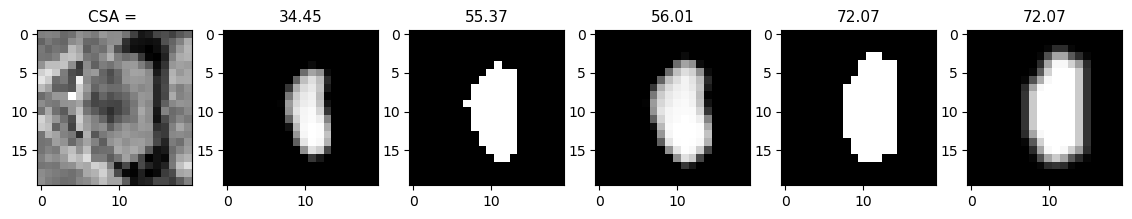

In [3]:
kernel = np.array([[0.1, 0.5, 0.1],
                  [0.5, 1, 0.5],
                  [0.1, 0.5, 0.1]])
index = 92
image_sc_ca_dil = dilation(image_sc_ca_n, footprint=None, out=None, shift_x=False, shift_y=False)
image_gt_bin_dil = convolve2d(image_sc[:,:,index], kernel, mode='same', boundary='wrap')

csa_ca_pred = round (np.sum(image_sc_ca_n[:,:,index]) * res_1 * res_2 , 2)
csa_ca_pred_bin = round (np.sum(image_sc_ca_bin[:,:,index]) * res_1 * res_2 , 2)
csa_ca_pred_dil = round (np.sum(image_sc_ca_dil[:,:,index]) * res_1 * res_2, 2)
csa_gt_bin = round (np.sum(image_sc[:,:,index]) * res_1 * res_2, 2)
csa_gt_bin_soft = round (np.sum(image_gt_bin_dil[:,:])/np.max(image_gt_bin_dil) * res_1 * res_2, 2)

plt.gray()
plt.figure(figsize=(14, 8))
plt.subplot(1, 6, 1)
plt.title("CSA = " , fontsize=11)
plt.imshow(image[80:100,115:135,index])
plt.subplot(1, 6, 2)
plt.title(csa_ca_pred , fontsize=11)
plt.imshow(image_sc_ca_n[80:100,115:135,index])
plt.subplot(1, 6, 3)
plt.title(csa_ca_pred_bin , fontsize=11)
plt.imshow(image_sc_ca_bin[80:100,115:135,index])
plt.subplot(1, 6, 4)
plt.title(csa_ca_pred_dil , fontsize=11)
plt.imshow(image_sc_ca_dil[80:100,115:135,index])
plt.subplot(1, 6, 5)
plt.title(csa_gt_bin , fontsize=11)
plt.imshow(image_sc[80:100,115:135,index])
plt.subplot(1, 6, 6)
plt.title(csa_gt_bin_soft , fontsize=11)
plt.imshow(image_gt_bin_dil[80:100,115:135])

print(csa_ca_pred, csa_ca_pred_dil, csa_gt_bin, csa_gt_bin_soft)

16.47 31.36 67.68 67.68


<Figure size 640x480 with 0 Axes>

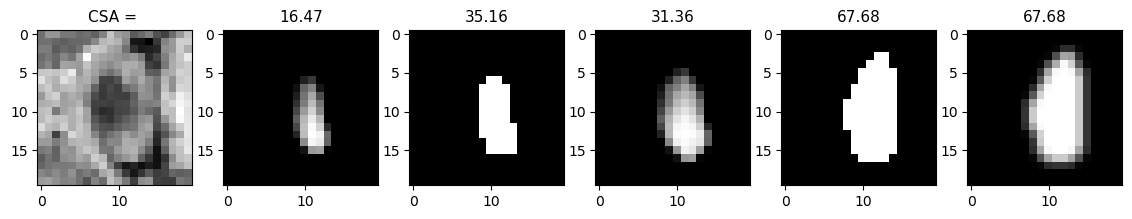

In [4]:
kernel = np.array([[0.1, 0.5, 0.1],
                  [0.5, 1, 0.5],
                  [0.1, 0.5, 0.1]])
index = 87
image_sc_ca_dil = dilation(image_sc_ca_n, footprint=None, out=None, shift_x=False, shift_y=False)
image_gt_bin_dil = convolve2d(image_sc[:,:,index], kernel, mode='same', boundary='wrap')

csa_ca_pred = round (np.sum(image_sc_ca_n[:,:,index]) * res_1 * res_2 , 2)
csa_ca_pred_bin = round (np.sum(image_sc_ca_bin[:,:,index]) * res_1 * res_2 , 2)
csa_ca_pred_dil = round (np.sum(image_sc_ca_dil[:,:,index]) * res_1 * res_2, 2)
csa_gt_bin = round (np.sum(image_sc[:,:,index]) * res_1 * res_2, 2)
csa_gt_bin_soft = round (np.sum(image_gt_bin_dil[:,:])/np.max(image_gt_bin_dil) * res_1 * res_2, 2)

plt.gray()
plt.figure(figsize=(14, 8))
plt.subplot(1, 6, 1)
plt.title("CSA = " , fontsize=11)
plt.imshow(image[80:100,115:135,index])
plt.subplot(1, 6, 2)
plt.title(csa_ca_pred , fontsize=11)
plt.imshow(image_sc_ca_n[80:100,115:135,index])
plt.subplot(1, 6, 3)
plt.title(csa_ca_pred_bin , fontsize=11)
plt.imshow(image_sc_ca_bin[80:100,115:135,index])
plt.subplot(1, 6, 4)
plt.title(csa_ca_pred_dil , fontsize=11)
plt.imshow(image_sc_ca_dil[80:100,115:135,index])
plt.subplot(1, 6, 5)
plt.title(csa_gt_bin , fontsize=11)
plt.imshow(image_sc[80:100,115:135,index])
plt.subplot(1, 6, 6)
plt.title(csa_gt_bin_soft , fontsize=11)
plt.imshow(image_gt_bin_dil[80:100,115:135])

print(csa_ca_pred, csa_ca_pred_dil, csa_gt_bin, csa_gt_bin_soft)

In [5]:
df = []
image_gt_bin_dil = np.zeros((image_sc.shape))
for i in range (168):
    image_gt_bin_dil[:,:,i] = convolve2d(image_sc[:,:,i], kernel, mode='same', boundary='wrap')
    csa_gt_bin_soft = round (np.sum(image_gt_bin_dil[:,:,i])/np.max(image_gt_bin_dil) * res_1 * res_2, 2)
    csa_gt_bin = round (np.sum(image_sc[:,:,i]) * res_1 * res_2, 2)
    csa_ca_pred = round (np.sum(image_sc_ca_n[:,:,i]) * res_1 * res_2 , 2)
    csa_ca_pred_bin = round (np.sum(image_sc_ca_bin[:,:,i]) * res_1 * res_2 , 2)
    csa_ca_pred_dil = round (np.sum(image_sc_ca_dil[:,:,i]) * res_1 * res_2, 2)
    
    d = {"slice":i,"csa_ca_pred":csa_ca_pred,"csa_ca_pred_bin":csa_ca_pred_bin,"csa_ca_pred_dil":csa_ca_pred_dil,"csa_gt_bin":csa_gt_bin
        ,"csa_gt_bin_soft":csa_gt_bin_soft}
    df.append(d)
data = pd.DataFrame(data = df)
df1=data
df1 = df1.replace(0, np.nan)
df1

,slice,csa_ca_pred,csa_ca_pred_bin,csa_ca_pred_dil,csa_gt_bin,csa_gt_bin_soft
0,NaN,11.44,20.21,22.65,32.52,32.52
1,1.0,16.24,23.73,29.34,32.52,32.52
2,2.0,18.08,27.25,31.90,35.16,35.16
3,3.0,19.03,29.00,33.04,32.52,32.52
4,4.0,19.81,28.12,34.33,32.52,32.52
...,...,...,...,...,...,...
163,163.0,67.14,91.41,92.88,100.20,100.20
164,164.0,70.16,90.53,96.48,99.32,99.32
165,165.0,73.93,97.56,100.99,107.23,107.23
166,166.0,77.62,100.20,105.53,111.62,111.62


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Contrast agnostic'),
  Text(1, 0, 'Contrast agnostic binary'),
  Text(2, 0, 'C.A. soft with soft dilation'),
  Text(3, 0, 'Binary GT'),
  Text(4, 0, 'Binary GT with soft dilation')])

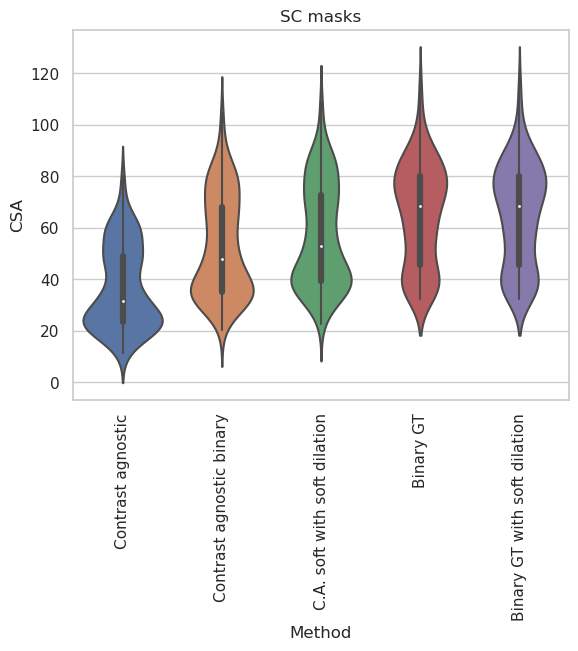

In [6]:

csa_ca_pred = df1.filter(['csa_ca_pred'], axis=1)
csa_ca_pred.insert(0, 'Method', 'Contrast agnostic')
csa_ca_pred.rename(columns={'csa_ca_pred': 'CSA'}, inplace=True)

csa_ca_pred_bin = df1.filter(['csa_ca_pred_bin'], axis=1)
csa_ca_pred_bin.insert(0, 'Method', 'Contrast agnostic binary')
csa_ca_pred_bin.rename(columns={'csa_ca_pred_bin': 'CSA'}, inplace=True)

csa_ca_pred_dil = df1.filter(['csa_ca_pred_dil'], axis=1)
csa_ca_pred_dil.insert(0, 'Method', 'C.A. soft with soft dilation')
csa_ca_pred_dil.rename(columns={'csa_ca_pred_dil': 'CSA'}, inplace=True)

csa_gt_bin = df1.filter(['csa_gt_bin'], axis=1)
csa_gt_bin.insert(0, 'Method', 'Binary GT')
csa_gt_bin.rename(columns={'csa_gt_bin': 'CSA'}, inplace=True)

csa_gt_bin_soft = df1.filter(['csa_gt_bin_soft'], axis=1)
csa_gt_bin_soft.insert(0, 'Method', 'Binary GT with soft dilation')
csa_gt_bin_soft.rename(columns={'csa_gt_bin_soft': 'CSA'}, inplace=True)

frames = [csa_ca_pred , csa_ca_pred_bin, csa_ca_pred_dil,csa_gt_bin, csa_gt_bin_soft ]
result = pd.concat(frames, axis=0)

sns.set(style="whitegrid")

plt.title("SC masks")
ax_csa_gm = sns.violinplot(data=result, x="Method", y="CSA")
plt.xticks(rotation=90)

In [7]:
image_gt_bin_dil = image_gt_bin_dil/np.max(image_gt_bin_dil)
nii_save = nib.Nifti1Image(image_gt_bin_dil, image_data.affine)
nib.save(nii_save, '../data_sep/lesions_qc/marseille-3T-mp2rage/derivatives/labels/sub-MRS01/ses-M0/anat/sub-MRS01_ses-M0_UNIT1_label-SC_softseg.nii.gz')

In [8]:
image_gt_bin_dil = image_sc_ca_dil/np.max(image_gt_bin_dil)
nii_save = nib.Nifti1Image(image_gt_bin_dil, image_data.affine)
nib.save(nii_save, '../data_sep/lesions_qc/marseille-3T-mp2rage/derivatives/labels/sub-MRS01/ses-M0/anat/sub-MRS01_ses-M0_UNIT1_pred_dil_soft.nii.gz')